#### Student Depression Variable Imputation

**Name:** Lesly Elizabeth Jimenez Burriola


#### Import Libraries

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### Read Dataset

In [266]:
df = pd.read_csv("Student_Depression_Dataset.csv")

#### Exploratory Data Analysis

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [268]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [269]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [270]:
# Borrar IDs
df = df.drop(["id"], axis=1)

In [271]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [272]:
df.shape

(27901, 17)

In [273]:
df = df.dropna()
df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [274]:
df["City"].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1339
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1065
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               684
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [275]:
df["City"].value_counts()[df["City"].value_counts() < 400].sum()

np.int64(26)

In [276]:
common_cities = df["City"].value_counts()[df["City"].value_counts() >= 400].index
df = df[df["City"].isin(common_cities)]

In [277]:
df["City"].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1339
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1065
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          684
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [278]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


#### Removing values in Age

<Axes: >

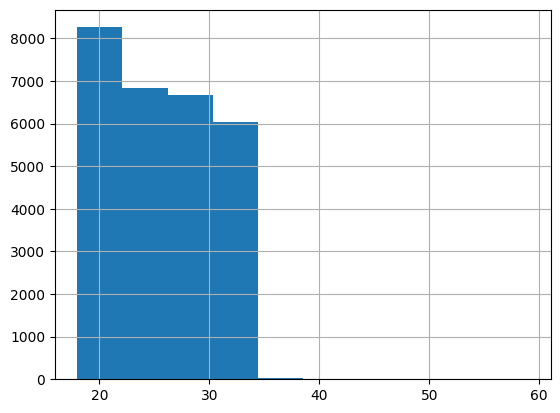

In [279]:
df["Age"].hist()

<Axes: >

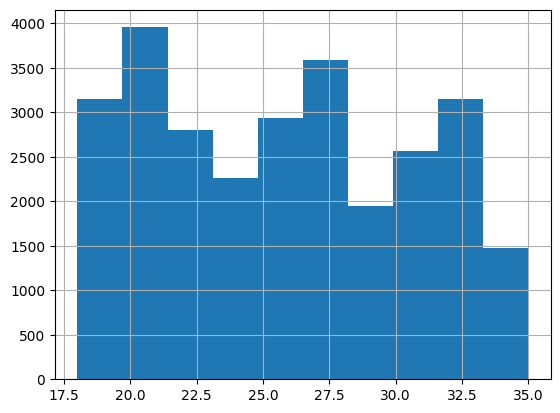

In [280]:
df["Age"] = df["Age"][df["Age"] <= 35]
df["Age"].hist()

In [281]:
df["Profession"].value_counts()

Profession
Student                   27841
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [282]:
df = df.drop(["Profession"], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [283]:
df["Academic Pressure"].value_counts()

Academic Pressure
3.0    7453
5.0    6293
4.0    5151
1.0    4796
2.0    4170
0.0       9
Name: count, dtype: int64

In [284]:
df["Academic Pressure"] = df["Academic Pressure"][df["Academic Pressure"] >= 2]
df["Academic Pressure"].value_counts()

Academic Pressure
3.0    7453
5.0    6293
4.0    5151
2.0    4170
Name: count, dtype: int64

In [285]:
df["Work Pressure"].value_counts()

Work Pressure
0.0    27869
5.0        2
2.0        1
Name: count, dtype: int64

In [286]:
df = df.drop(["Work Pressure"], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [287]:
df["CGPA"].value_counts()

CGPA
8.0400    821
9.9600    425
5.7400    410
8.9500    370
9.2100    342
         ... 
6.6400      1
7.0625      1
6.9800      1
6.4400      1
6.0900      1
Name: count, Length: 332, dtype: int64

<Axes: >

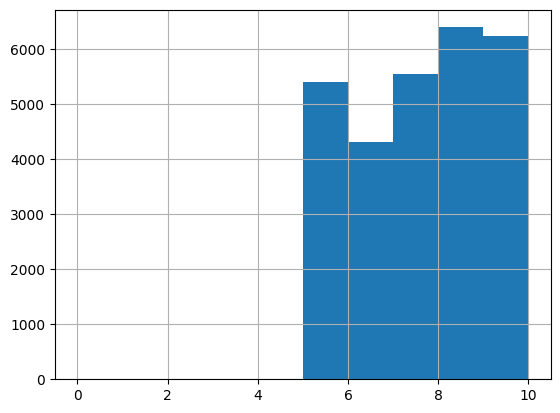

In [288]:
df["CGPA"].hist()

<Axes: >

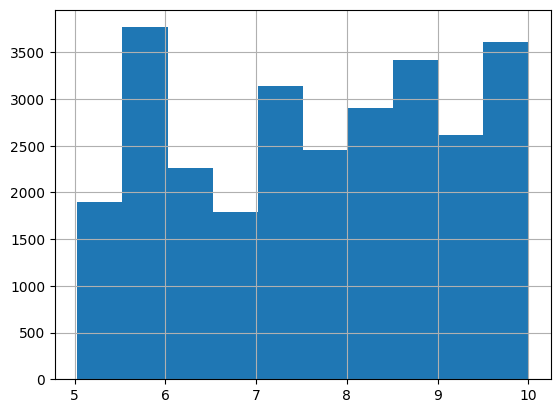

In [289]:
df["CGPA"] = df["CGPA"][df["CGPA"] > 5]
df["CGPA"].hist()

In [290]:
df["Study Satisfaction"].value_counts()

Study Satisfaction
4.0    6355
2.0    5831
3.0    5817
1.0    5440
5.0    4419
0.0      10
Name: count, dtype: int64

<Axes: >

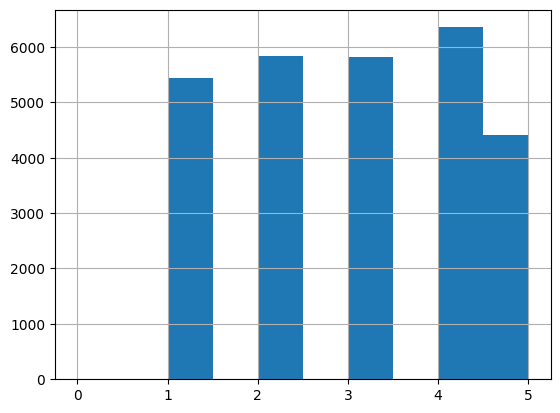

In [291]:
df["Study Satisfaction"].hist()

In [292]:
df["Study Satisfaction"] = df["Study Satisfaction"][df["Study Satisfaction"] >= 1]
df["Study Satisfaction"].value_counts()

Study Satisfaction
4.0    6355
2.0    5831
3.0    5817
1.0    5440
5.0    4419
Name: count, dtype: int64

In [293]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [294]:
df["Job Satisfaction"].value_counts()

Job Satisfaction
0.0    27864
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64

In [295]:
df = df.drop(["Job Satisfaction"], axis=1)

In [296]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [297]:
df["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8302
7-8 hours            7336
5-6 hours            6175
More than 8 hours    6041
Others                 18
Name: count, dtype: int64

In [298]:
# Delete others category
df = df.loc[df["Sleep Duration"] != "Others"]
df["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8302
7-8 hours            7336
5-6 hours            6175
More than 8 hours    6041
Name: count, dtype: int64

In [299]:
df["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10295
Moderate      9908
Healthy       7639
Others          12
Name: count, dtype: int64

In [300]:
# Delete others category
df = df.loc[df["Dietary Habits"] != "Others"]
df["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10295
Moderate      9908
Healthy       7639
Name: count, dtype: int64

In [301]:
df["Degree"].value_counts() #transformation

Degree
Class 12    6074
B.Ed        1861
B.Com       1503
B.Arch      1476
BCA         1429
MSc         1187
B.Tech      1151
MCA         1041
M.Tech      1019
BHM          924
BSc          886
M.Ed         817
B.Pharm      809
M.Com        734
BBA          696
MBBS         694
LLB          669
BE           609
BA           595
M.Pharm      581
MD           571
MBA          560
MA           544
PhD          520
LLM          481
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [302]:
df["Have you ever had suicidal thoughts ?"].value_counts()

Have you ever had suicidal thoughts ?
Yes    17619
No     10223
Name: count, dtype: int64

In [303]:
df["Work/Study Hours"].value_counts()

Work/Study Hours
10.0    4227
12.0    3164
11.0    2888
8.0     2505
6.0     2241
9.0     2024
7.0     1995
0.0     1696
4.0     1608
2.0     1584
3.0     1467
5.0     1296
1.0     1147
Name: count, dtype: int64

In [304]:
df["Financial Stress"].value_counts()

Financial Stress
5.0    6701
4.0    5769
3.0    5217
1.0    5106
2.0    5049
Name: count, dtype: int64

In [305]:
df["Family History of Mental Illness"].value_counts()

Family History of Mental Illness
No     14362
Yes    13480
Name: count, dtype: int64

In [306]:
df["Depression"].value_counts()

Depression
1    16303
0    11539
Name: count, dtype: int64

#### Data Transformation

In [307]:

df["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8297
7-8 hours            7333
5-6 hours            6172
More than 8 hours    6040
Name: count, dtype: int64

In [308]:
df.loc[df["Sleep Duration"] == "Less than 5 hours", "Sleep Duration"] = 0
df.loc[df["Sleep Duration"] == "5-6 hours", "Sleep Duration"] = 1
df.loc[df["Sleep Duration"] == "7-8 hours", "Sleep Duration"] = 2
df.loc[df["Sleep Duration"] == "More than 8 hours", "Sleep Duration"] = 3
df["Sleep Duration"].value_counts()

Sleep Duration
0    8297
2    7333
1    6172
3    6040
Name: count, dtype: int64

In [309]:
df["Dietary Habits"].value_counts()
df = df.loc[df["Dietary Habits"] != "Others"]
df["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10295
Moderate      9908
Healthy       7639
Name: count, dtype: int64

In [310]:
df.loc[df["Dietary Habits"] == "Healthy", "Dietary Habits"] = 0
df.loc[df["Dietary Habits"] == "Unhealthy", "Dietary Habits"] = 1
df.loc[df["Dietary Habits"] == "Moderate", "Dietary Habits"] = 2
df["Dietary Habits"].value_counts()

Dietary Habits
1    10295
2     9908
0     7639
Name: count, dtype: int64

In [311]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,1,0,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,1,2,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0,0,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,2,2,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,1,2,M.Tech,Yes,1.0,1.0,No,0


In [312]:
# Creating new degree column with
df.loc[df["Degree"].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|B|LLB', regex=True), "new_degree"] = "Graduated"
df.loc[df["Degree"].str.contains(r'MSc|M|LLM', regex=True), "new_degree"] = "Post Graduated"
df.loc[df["Degree"] == "Class 12", "new_degree"] = "High School"
df = df.loc[df["Degree"] != "Others"]
df["new_degree"].value_counts()

new_degree
Graduated         11684
Post Graduated     9529
High School        6074
Name: count, dtype: int64

In [313]:
df.loc[df["new_degree"] == "Graduated", "new_degree"] = 0
df.loc[df["new_degree"] == "Post Graduated", "new_degree"] = 1
df.loc[df["new_degree"] == "High School", "new_degree"] = 2
df.fillna("Others")
df["new_degree"].value_counts()

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_7836\2172905134.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna("Others")


new_degree
0    11684
1     9529
2     6074
Name: count, dtype: int64

In [314]:
df["Family History of Mental Illness"].head()

0     No
1    Yes
2    Yes
3    Yes
4     No
Name: Family History of Mental Illness, dtype: object

In [315]:
df.loc[df["Family History of Mental Illness"] == "Yes", "Family History of Mental Illness"] = 0
df.loc[df["Family History of Mental Illness"] == "No", "Family History of Mental Illness"] = 1
df["Family History of Mental Illness"].value_counts()

Family History of Mental Illness
1    14343
0    13464
Name: count, dtype: int64

In [316]:
df = df.drop(["Degree"], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,new_degree
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,1,0,Yes,3.0,1.0,1,1,0
1,Female,24.0,Bangalore,2.0,5.90,5.0,1,2,No,3.0,2.0,0,0,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0,0,No,9.0,1.0,0,0,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,2,2,Yes,4.0,5.0,0,1,0
4,Female,25.0,Jaipur,4.0,8.13,3.0,1,2,Yes,1.0,1.0,1,0,1


In [317]:
df["Gender"].head()
df.loc[df["Gender"] == "Male", "Gender"] = 0
df.loc[df["Gender"] == "Female", "Gender"] = 1
df["Gender"].value_counts()

Gender
0    15496
1    12311
Name: count, dtype: int64

In [318]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,new_degree
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,1,0,Yes,3.0,1.0,1,1,0
1,1,24.0,Bangalore,2.0,5.90,5.0,1,2,No,3.0,2.0,0,0,0
2,0,31.0,Srinagar,3.0,7.03,5.0,0,0,No,9.0,1.0,0,0,0
3,1,28.0,Varanasi,3.0,5.59,2.0,2,2,Yes,4.0,5.0,0,1,0
4,1,25.0,Jaipur,4.0,8.13,3.0,1,2,Yes,1.0,1.0,1,0,1


In [319]:
df["Have you ever had suicidal thoughts ?"].head()
df.loc[df["Have you ever had suicidal thoughts ?"] == "Yes", "Have you ever had suicidal thoughts ?"] = 0
df.loc[df["Have you ever had suicidal thoughts ?"] == "No", "Have you ever had suicidal thoughts ?"] = 1
df["Have you ever had suicidal thoughts ?"].value_counts()

Have you ever had suicidal thoughts ?
0    17599
1    10208
Name: count, dtype: int64

In [320]:
len(df["City"].value_counts())

30

In [321]:
#One hot encoding
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(sparse_output=False)
#encoded = encoder.fit(df[["City"]])
#encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["City"]))
#Adjusting index
#encoded_df.index = df.index
#df.encoded = pd.concat([df, encoded_df], axis=1)

In [325]:
#One hot encoding with pandas
df_encoded = pd.get_dummies(df, columns=["City"], drop_first=True)
df_encoded.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,0,33.0,5.0,8.97,2.0,1,0,0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,True
1,1,24.0,2.0,5.90,5.0,1,2,1,3.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,0,31.0,3.0,7.03,5.0,0,0,1,9.0,1.0,...,False,False,False,True,False,False,False,False,False,False
3,1,28.0,3.0,5.59,2.0,2,2,0,4.0,5.0,...,False,False,False,False,False,False,False,True,False,False
4,1,25.0,4.0,8.13,3.0,1,2,0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [327]:
df_encoded.replace({False:0, True:1}, inplace=True)
df_encoded.head()

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_7836\3042749720.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace({False:0, True:1}, inplace=True)


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,0,33.0,5.0,8.97,2.0,1,0,0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,1,24.0,2.0,5.90,5.0,1,2,1,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,0,31.0,3.0,7.03,5.0,0,0,1,9.0,1.0,...,0,0,0,1,0,0,0,0,0,0
3,1,28.0,3.0,5.59,2.0,2,2,0,4.0,5.0,...,0,0,0,0,0,0,0,1,0,0
4,1,25.0,4.0,8.13,3.0,1,2,0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
